In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://practicum-content.s3.us-west-1.amazonaws.com/datasets/segments.csv

data = pd.read_csv('segments.csv')

# Centroides asignados
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

In [5]:
# Entrenar un modelo sin centroides iniciales
model = KMeans(n_clusters=3, random_state=12345)
model.fit(data)

print('Centroides de clúster:')
print(model.cluster_centers_)

print('Función objetivo:')
print(model.inertia_)

/home/alexkhype/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroides de clúster:
[[10.68632155 98.90275017 10.856     ]
 [40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]]
Función objetivo:
68431.50999400373


In [6]:
# Entrenar un modelo con centroides iniciales
model = KMeans(n_clusters=3, init=centers, random_state=12345)
model.fit(data)

print('Centroides de clúster del modelo con centroides iniciales:')
print(model.cluster_centers_)

print('La función objetivo del modelo con centroides iniciales:')
print(model.inertia_)

Centroides de clúster del modelo con centroides iniciales:
[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]]
La función objetivo del modelo con centroides iniciales:
74253.203635621


/home/alexkhype/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/alexkhype/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


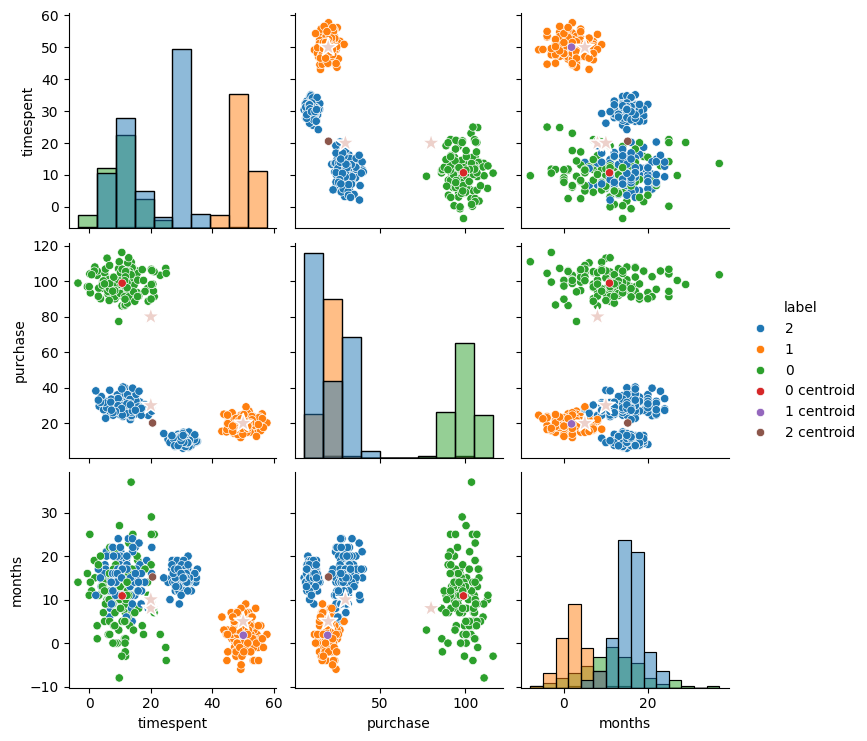

In [8]:
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

centroids_init = pd.DataFrame(centers, columns=data.columns)
centroids_init['label'] = 4

data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid', '2 centroid']
# Se requiere una reconfiguración de índice para crear pairgrid.data
data_all = pd.concat([data, centroids], ignore_index=True)

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')
# Una capa extra para los centroides
pairgrid.data = centroids_init
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

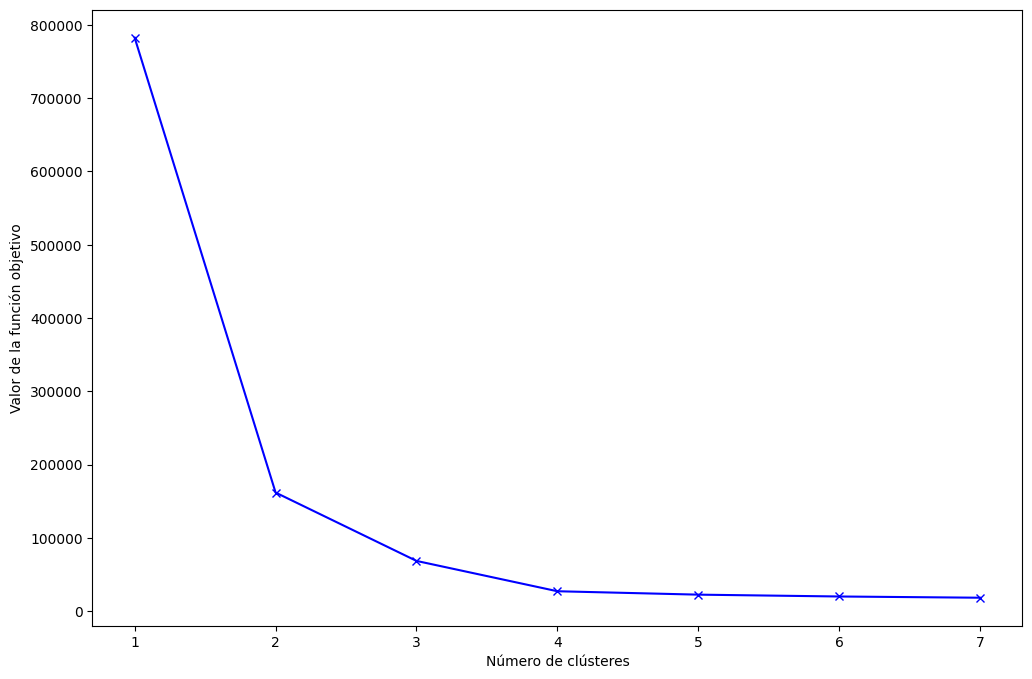

In [13]:
distortion = []
K = range(1, 8)

for k in K:
    model = KMeans(n_clusters=k, random_state=12345, n_init=10)
    model.fit(data)
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Número de clústeres')
plt.ylabel('Valor de la función objetivo')
plt.show()

In [14]:
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345, n_init=10)
    model.fit(data)
        
    print('Número de clústeres:', k) 
    print('Valor de la función objetivo', model.inertia_)

Número de clústeres: 1
Valor de la función objetivo 782566.18547307
Número de clústeres: 2
Valor de la función objetivo 161816.98286935443
Número de clústeres: 3
Valor de la función objetivo 68494.00999400373
Número de clústeres: 4
Valor de la función objetivo 27110.790247969926
Número de clústeres: 5
Valor de la función objetivo 22468.76658543916
Número de clústeres: 6
Valor de la función objetivo 19951.139656355255
Número de clústeres: 7
Valor de la función objetivo 18270.002995133313


   timespent   purchase  months label
0   9.749627  26.984142    14.0     3
1  30.416766   5.916530    15.0     0
2   8.809746  35.502827    14.0     3
3  31.418008   9.820529    18.0     0
4  48.279014  18.359423     2.0     2


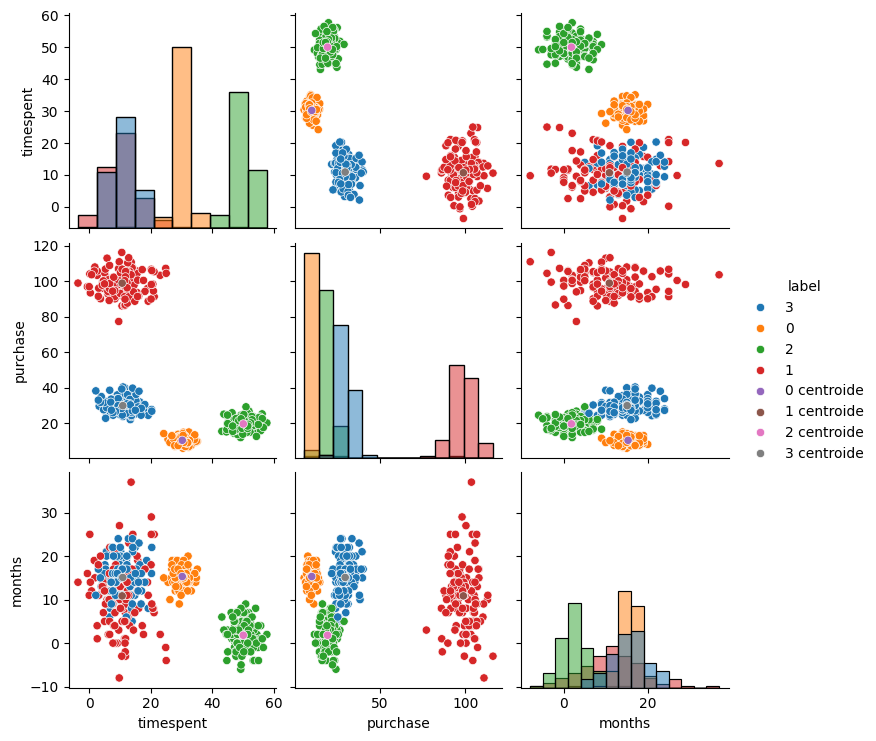

In [15]:
model = KMeans(n_clusters=4, random_state=12345, n_init=10)

model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroide', '1 centroide', '2 centroide', '3 centroide']
data_all = pd.concat([data, centroids], ignore_index=True)

# Traza el gráfico
sns.pairplot(data_all, hue='label', diag_kind='hist')

print(data.head())

In [17]:
# https://practicum-content.s3.us-west-1.amazonaws.com/datasets/cars.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('cars.csv')

    mpg: consumo de combustible (millas por galón)
    cylinders: número de cilindros
    cubicinches: volumen del motor
    hp: potencia del motor (caballos de fuerza)
    weightlbs: peso del auto
    time-to-60: tiempo que tarda en acelerar hasta 60 millas por hora
    year: año de producción
    brand: país de fabricación

/home/alexkhype/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


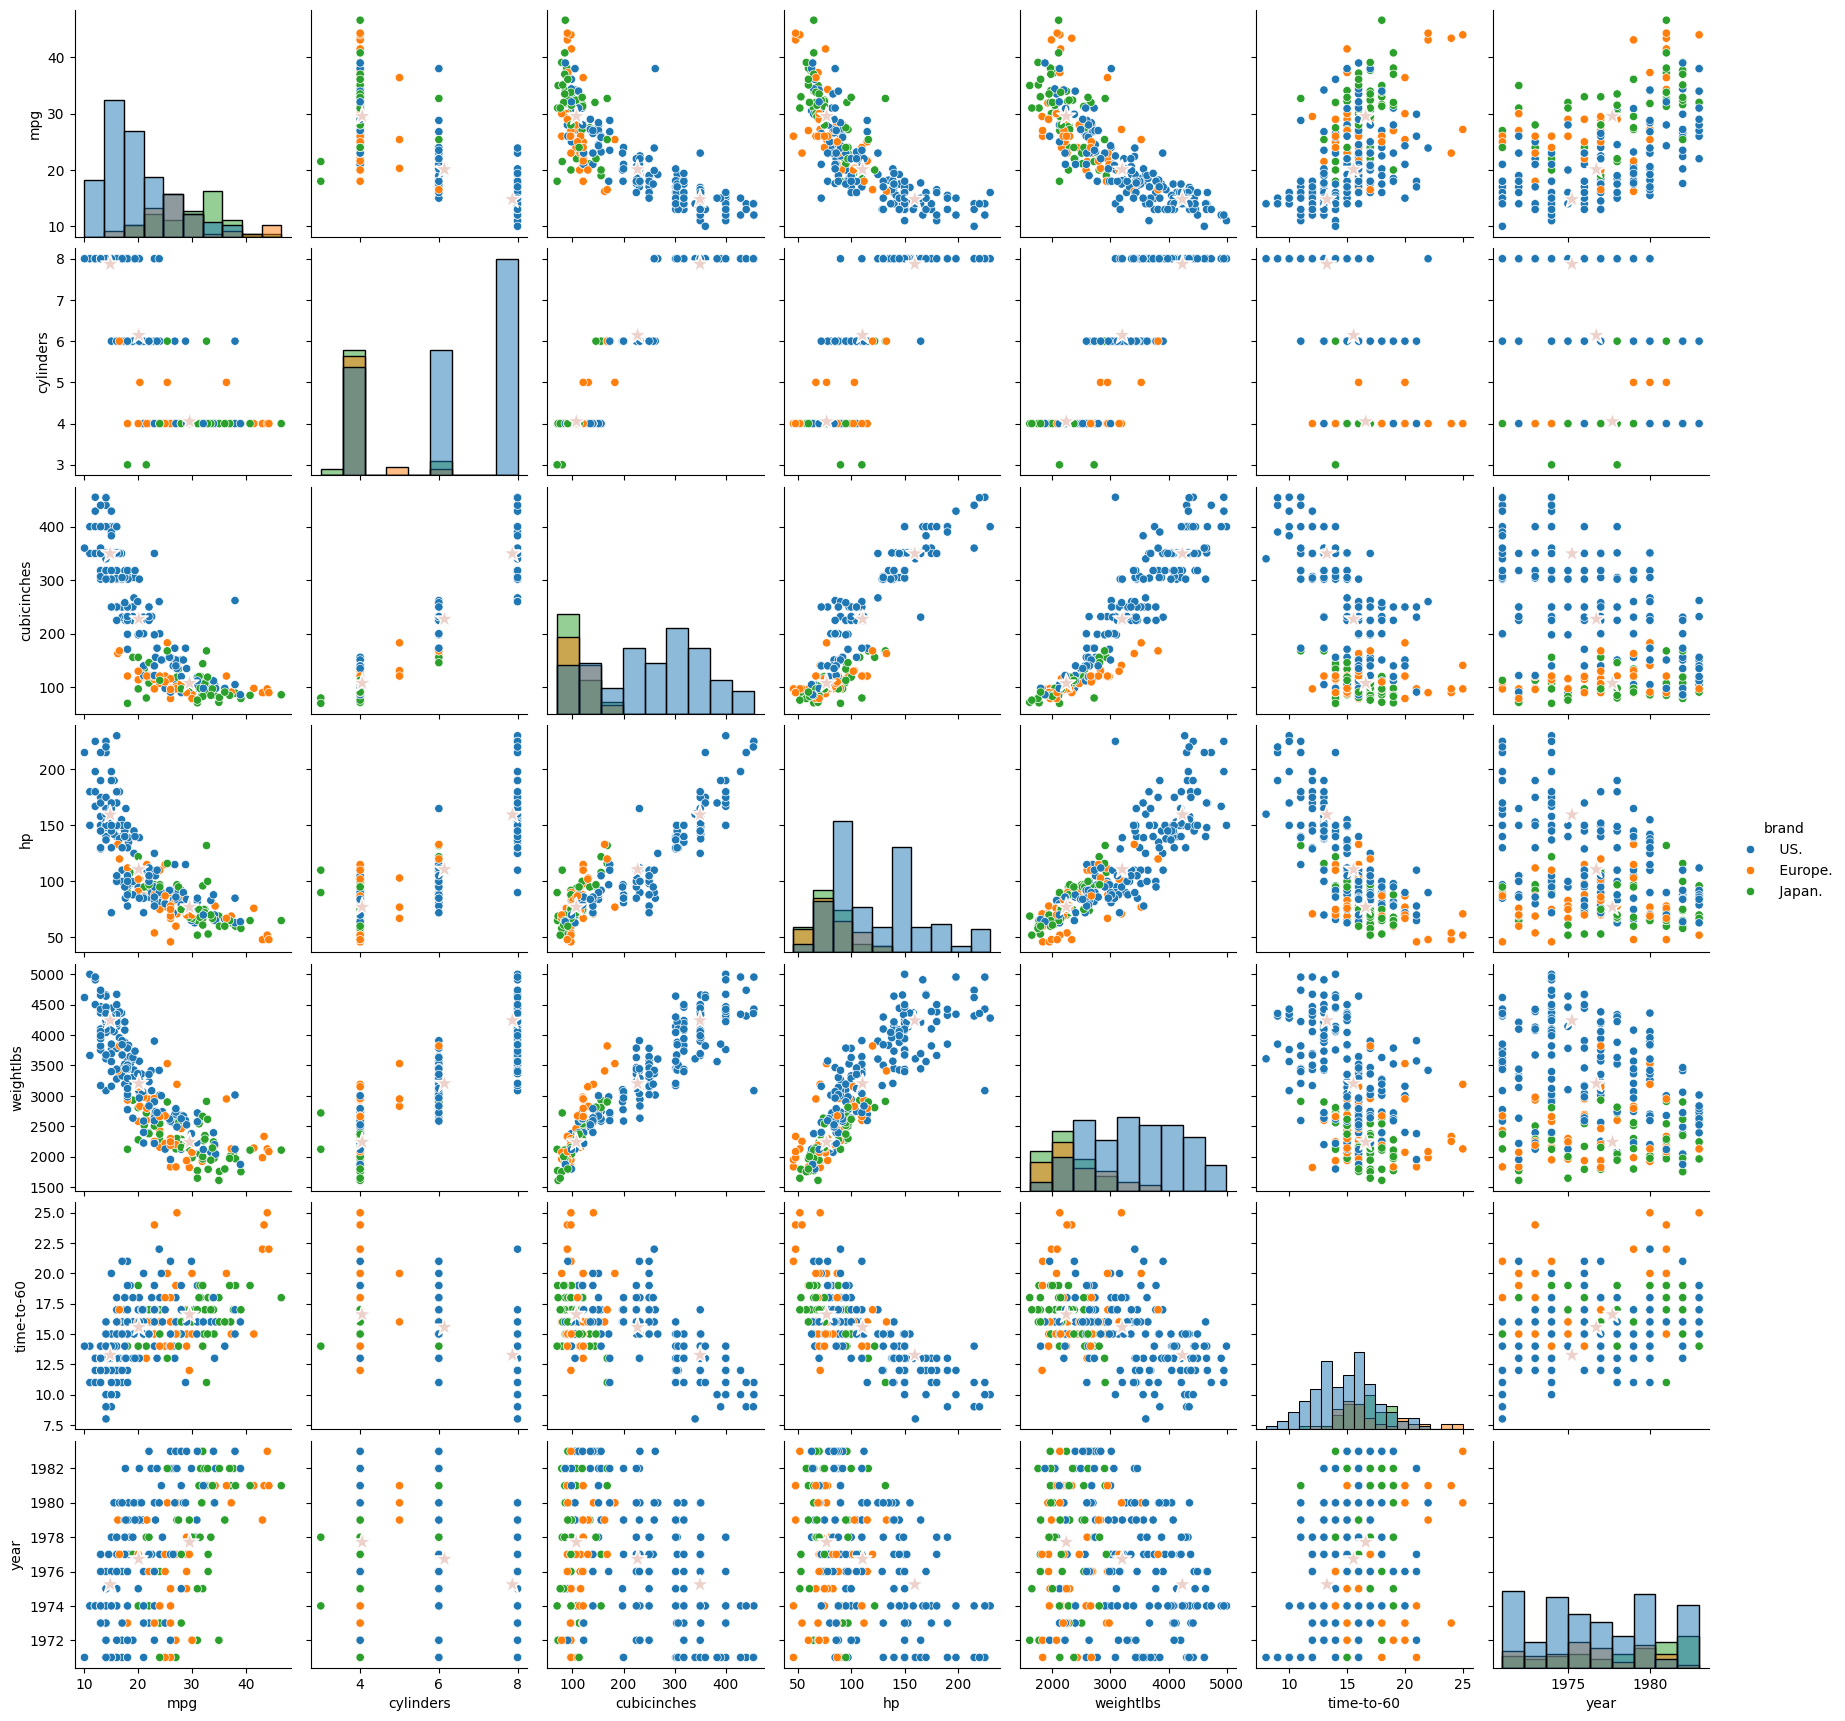

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/cars_label.csv')

data = data_full.drop(columns=['brand'])

# Entrenamiento del modelo
model = KMeans(n_clusters=3, random_state=12345, n_init=10)
model.fit(data)

# Capa extra para los centroides
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

# Trazar el gráfico
pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
centroids['brand'] = 4
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')